In [1]:
!pip install tensorflow matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


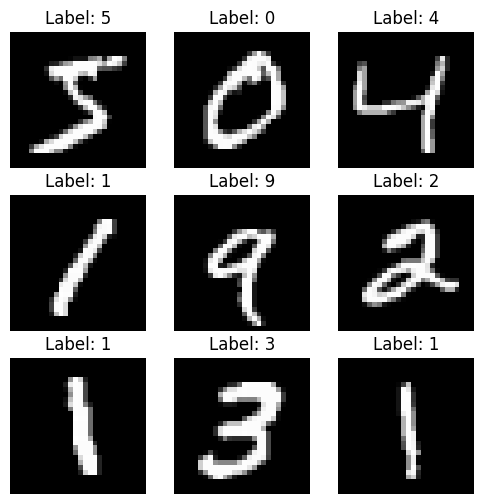

In [5]:
# Show first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [6]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=128)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.8981 - loss: 0.3279 - val_accuracy: 0.9812 - val_loss: 0.0616
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9688 - loss: 0.1073 - val_accuracy: 0.9858 - val_loss: 0.0481
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9765 - loss: 0.0776 - val_accuracy: 0.9872 - val_loss: 0.0413
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9816 - loss: 0.0616 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9837 - loss: 0.0540 - val_accuracy: 0.9895 - val_loss: 0.0391
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9908 - val_loss: 0.0349
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9898 - val_loss: 0.0363
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9893 - loss: 0.0351 - 

In [9]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0290
Test Loss: 0.0290, Test Accuracy: 0.9908


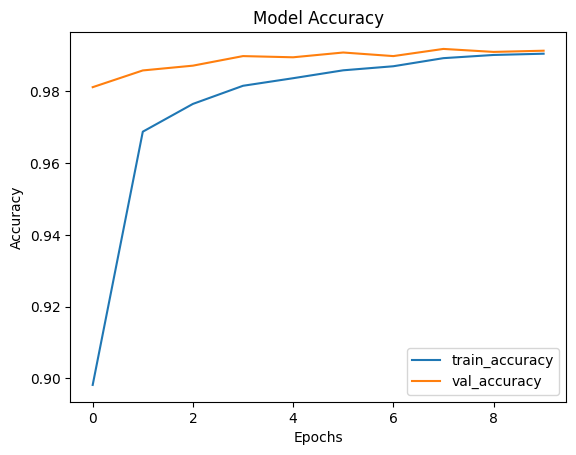

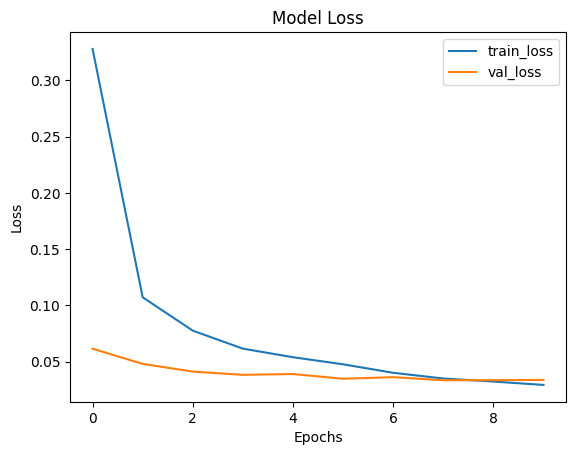

In [10]:
# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


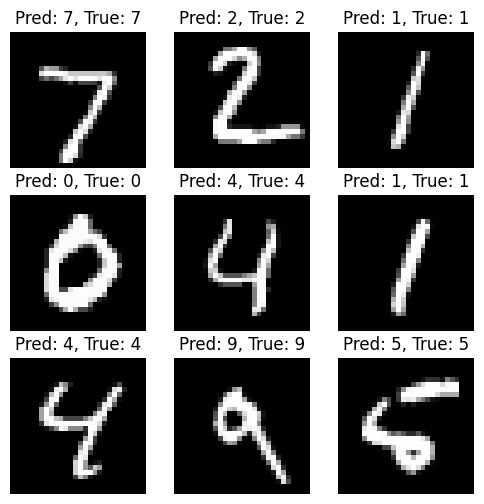

In [11]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

# Display first 9 test images with predictions
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()


In [12]:
!pip install gradio


Defaulting to user installation because normal site-packages is not writeable


In [20]:
import gradio as gr
import numpy as np
from PIL import ImageOps

def predict_digit(img):
    # Convert to grayscale and resize
    img = img.convert("L").resize((28,28))
    
    # Invert colors (MNIST: white digit on black background)
    img = ImageOps.invert(img)
    
    # Convert to numpy array and normalize
    img_array = np.array(img).reshape(1,28,28,1) / 255.0
    
    # Make prediction
    pred = model.predict(img_array)
    
    # Return all probabilities as a dictionary
    return {str(i): float(pred[0][i]) for i in range(10)}



In [21]:
import gradio as gr

iface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(
        type="pil",        # returns a PIL Image
        image_mode="L",    # grayscale
        #tool="editor"      # allows drawing
    ),
    outputs=gr.Label(num_top_classes=1),
    title="MNIST Handwritten Digit Recognition",
    description="Draw a digit (0-9) in the canvas and get prediction",
)

iface.launch(share=True)


* Running on local URL:  http://127.0.0.1:7867

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
